In [2]:
import numpy
from matplotlib import pyplot
import ipywidgets
%matplotlib inline

In [3]:
pyplot.rc('font', family='serif', size=16)

In [6]:
def rho_red_light( x, rho_max ):
    
    rho = numpy.full_like( x, rho_max )
    mask = numpy.where( x < 3 )
    rho[ mask ] /= 2
    
    return rho

In [7]:
# Set parameters

nx = 81
L = 4.
dx = L / ( nx - 1 )
x = numpy.linspace( 0., L, nx )

rho_max = 10.
u_max = 1.

rho0 = rho_red_light( x, rho_max )

In [8]:
def plot( n, x, rho_hist ):
    
    pyplot.figure()
    pyplot.grid()
    pyplot.title( 'Time step: {}'.format( n ) )
    pyplot.xlabel( 'Road [km]' )
    pyplot.ylabel( 'Traffic density [cars/hour]' )
    pyplot.plot( x, rho_hist[ n ] )
    pyplot.xlim( x[ 0 ], x[ -1 ] )
    pyplot.ylim( 4., 11. )
    pyplot.show()
    

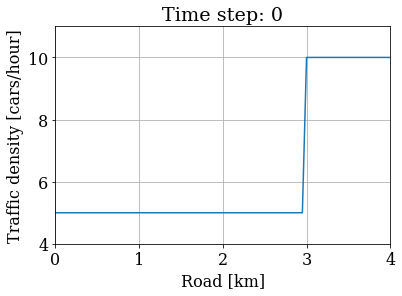

In [9]:
plot( 0, x, [ rho0 ] )

In [40]:
def traffic_speed( rho, u_max, rho_max ):
    
    return u_max * ( 1 - rho / rho_max )

def traffic_flux( rho, u_max, rho_max ):
    
    return rho * traffic_speed( rho, u_max, rho_max )

In [58]:
def interactive_plot( x, rho_hist ):
    
    nt = len( rho_hist ) - 1
    nt_slider = ipywidgets.IntSlider( value = 0, min = 0, max = nt, step = 1, description = 'Time step' )
    w = ipywidgets.interactive( plot, n = nt_slider, x = ipywidgets.fixed( x ), rho_hist = ipywidgets.fixed( rho_hist ) )
    
    
    return w

In [59]:
interactive_plot( x, [ rho0 ] )

interactive(children=(IntSlider(value=0, description='Time step', max=0), Output()), _dom_classes=('widget-int…

In [67]:
def lax_friedrichs( rho0, nt, dt, dx, u_max, rho_max ):
    
    rho = rho0.copy()
    rho_hist = [ rho0.copy() ]
    
    for n in range( nt ):
        
        rho_n = rho.copy()
        flux = traffic_flux( rho_n, u_max, rho_max )
        rho[ 1:-1 ] = -( flux[ 2: ] - flux[ :-2 ] ) * dt / ( 2 * dx ) + .5 * ( rho_n[ :-2 ] + rho_n[ 2: ] )
        rho_hist.append( rho.copy() )
    
    return rho_hist

In [72]:
nt = 40
sigma = 1.
dt = sigma * dx / u_max
rho_hist = lax_friedrichs( rho0, nt, dt, dx, u_max, rho_max )

In [73]:
interactive_plot( x, rho_hist )

interactive(children=(IntSlider(value=0, description='Time step', max=40), Output()), _dom_classes=('widget-in…

In [76]:
nt = 80
sigma = .5
dt = sigma * dx / u_max
rho_hist = lax_friedrichs( rho0, nt, dt, dx, u_max, rho_max )

In [77]:
interactive_plot( x, rho_hist )

interactive(children=(IntSlider(value=0, description='Time step', max=80), Output()), _dom_classes=('widget-in…

In [84]:
def traffic_jacobian( rho, u_max, rho_max ):
    
    J = u_max * ( 1 - 2 * rho / rho_max )
    
    return J

def lax_wendroff( rho0, nt, dt, dx, u_max, rho_max ):
    
    rho = rho0.copy()
    rho_hist = [ rho0.copy() ]
    
    for n in range( nt ):
        
        rho_n = rho.copy()
        flux = traffic_flux( rho_n, u_max, rho_max )
        J = traffic_jacobian( rho_n, u_max, rho_max )
        rho[ 1:-1 ] = ( rho_n[ 1:-1 ] - dt / ( 2 * dx ) * ( flux[ 2: ] - flux[ :-2 ] ) + dt**2 / ( 4 * dx**2 ) * 
                      ( ( J[ 1:-1 ] + J[ 2: ] ) * ( flux[ 2: ] - flux[ 1:-1 ] ) - ( J[ :-2 ] + J[ 1:-1 ] ) * 
                      ( flux[ 1:-1 ] - flux[ :-2 ] ) ) ) 
        rho_hist.append( rho.copy() )
    
    return rho_hist

In [85]:
nt = 40
sigma = 1.
dt = sigma * dx / u_max
rho_hist = lax_wendroff( rho0, nt, dt, dx, u_max, rho_max )

In [86]:
interactive_plot( x, rho_hist )

interactive(children=(IntSlider(value=0, description='Time step', max=40), Output()), _dom_classes=('widget-in…

In [87]:
nt = 80
sigma = .5
dt = sigma * dx / u_max
rho_hist = lax_wendroff( rho0, nt, dt, dx, u_max, rho_max )

In [88]:
interactive_plot( x, rho_hist )

interactive(children=(IntSlider(value=0, description='Time step', max=80), Output()), _dom_classes=('widget-in…